In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/python/학교_수업/데이터분석_민진영 교수님/6_Crowdfunding_ex.xlsx')

In [3]:
import numpy as np
import seaborn as sns
import warnings
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리
!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
pd.set_option('display.max_columns', None)
#한글 폰트 다운


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [4]:
df.isnull().sum().sum()

0

데이터 분석에 사용하지 않을 title , shortdescription 을 삭제 , country와 tag는 code로 대체함 , startdate와 enddate는 삭제한 뒤 period만 사용


단 후에 식별 가능을 위해서 project id는 열 삭제를 하지 않고 남겨두고 데이터 분석에는 사용하지 않음

In [5]:
df.drop( columns = [  'Title' , 'Country' ,'ShortDescription' , 'Location','Tag' ,'StartDate' , 'EndDate' ,'LocationCode' ] , inplace = True )

Updates_Likes , Updates_Comments 피쳐를 Total_Updates 로 나누어서

업데이트 당 likes , comments 로 변경하여 피쳐들 간의 다중공산성을 낮추겠다.

In [6]:
df['likes/updates'] = df['Updates_Likes'] / (df['Total_Updates'] + 0.001) #0.001 분모가 0되는것 방지
df['comments/updates'] = df['Updates_Comments'] / (df['Total_Updates'] + 0.001)
df.drop( columns = [ 'Updates_Likes' , 'Updates_Comments' ] , inplace = True )
df['comments/commenters'] = df['#ofComments'] / (df['#ofCommenters'] + 0.001)
df.drop( columns = '#ofComments'  , inplace = True )
#비슷한 이유로 변경

In [7]:
df.describe()

,Backers,Funded,FundedRate,Success,CountryCode,VideoCount,ImageCount,TagCode,Goal,Period,SNS,Friends,#ofCreation,#ofSuccess,#ofInvest,#ofInvestSuccess,#ofRewards,#ofCommenters,Total_Updates,likes/updates,comments/updates,comments/commenters
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,7.670000e+02,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,102.126467,9520.107132,698.734746,1.715776,2.370274,0.298566,7.451108,7.659713,2.331581e+05,33.535854,0.500652,419.159061,2.289439,0.242503,0.568449,1.868318,7.469361,1.920469,2.286832,1.051424,0.214879,484.319792
std,356.999621,44730.985067,17100.046080,0.451338,2.745241,1.092718,11.033767,4.000030,5.490664e+06,11.796953,0.500326,829.044874,3.281753,1.036472,2.023413,4.986627,6.207995,12.506299,3.715555,2.624472,1.011514,3449.958072
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.930000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,2.000000e+03,29.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,455.000000,9.500000,2.000000,1.000000,0.000000,2.000000,7.000000,8.300000e+03,30.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,4503.500000,103.000000,2.000000,3.000000,0.000000,11.000000,11.000000,2.265442e+04,37.000000,1.000000,541.500000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,3.000000,0.999001,0.000000,1.316423
max,5829.000000,949925.340000,473600.000000,2.000000,15.000000,12.000000,85.000000,15.000000,1.520589e+08,60.000000,1.000000,5000.000000,20.000000,10.000000,29.000000,31.000000,56.000000,298.000000,35.000000,25.997111,15.996801,72000.000000


code 피쳐의 카테고리 특성을 살리기 위해서 원핫인코딩 하겠습니다.

In [8]:
df = pd.get_dummies(df, columns=['CountryCode', 'TagCode'])
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df

<ipython-input-8-c3d4f3bdcad6>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,Project ID,Backers,Funded,FundedRate,Success,VideoCount,ImageCount,Goal,Period,SNS,Friends,#ofCreation,#ofSuccess,#ofInvest,#ofInvestSuccess,#ofRewards,#ofCommenters,Total_Updates,likes/updates,comments/updates,comments/commenters,CountryCode_1,CountryCode_2,CountryCode_3,CountryCode_4,CountryCode_5,CountryCode_6,CountryCode_7,CountryCode_8,CountryCode_9,CountryCode_10,CountryCode_11,CountryCode_12,CountryCode_14,CountryCode_15,TagCode_1,TagCode_2,TagCode_3,TagCode_4,TagCode_5,TagCode_6,TagCode_7,TagCode_8,TagCode_9,TagCode_10,TagCode_11,TagCode_12,TagCode_13,TagCode_14,TagCode_15
0,prjt1,0,0.00,0.00,2,0,0,4800.00,19,1,26,1,0,0,0,1,0,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,prjt2,4,1140.00,11.40,2,0,0,10000.00,30,1,2873,11,0,0,0,9,0,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,prjt3,0,0.00,0.00,2,0,0,5361.53,30,1,583,1,0,0,0,2,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,prjt4,1,34.51,0.10,2,0,3,34513.70,30,1,4675,1,0,0,0,4,0,7,0.285673,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,prjt5,1510,52471.00,1049.42,1,0,39,5000.00,59,0,0,1,0,0,4,8,18,13,6.768710,0.999923,1.722127,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,prjt988,77,5427.00,15.50,2,0,30,35000.00,44,1,36,1,0,0,5,8,1,1,0.000000,0.000000,5.994006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
763,prjt990,32,3335.00,22.20,2,0,0,15000.00,29,0,0,1,0,0,0,9,0,3,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
764,prjt991,1050,47317.00,169.00,1,0,13,28000.00,30,1,222,1,0,2,3,15,2,10,4.999500,0.499950,6.496752,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
765,prjt992,26,640.00,85.30,2,0,13,750.00,28,1,740,8,4,0,6,10,1,6,0.000000,0.333278,1.998002,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# EDA 진행

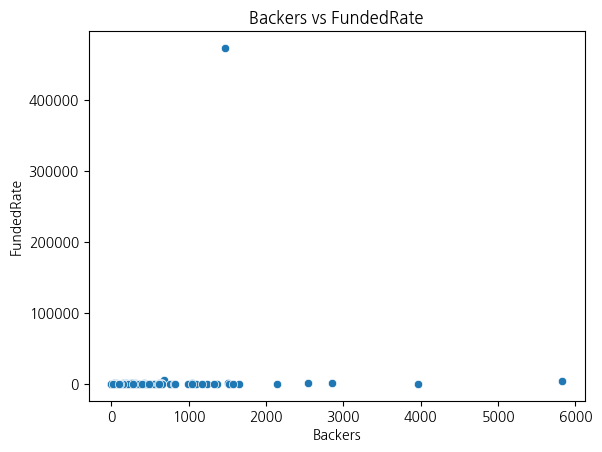

In [9]:
sns.scatterplot(x='Backers', y='FundedRate', data=df)
plt.title('Backers vs FundedRate')
plt.show()

fundedrate가 너무 크게 초과 달성한 경우가 있다.
이 데이터는 학습에서 빼겠다. 학습과정에서 크게 영향을 끼칠 우려가 있다

In [10]:
df = df[df['FundedRate'] != df['FundedRate'].max()]

<ipython-input-11-417f2bbdd437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_fundedrate'] = np.log1p(df['FundedRate'])
<ipython-input-11-417f2bbdd437>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_backers'] = np.log1p(df['Backers'])


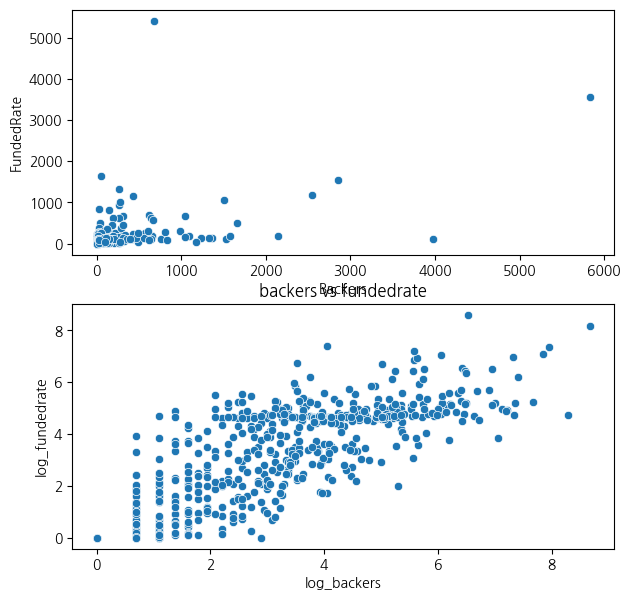

In [11]:
df['log_fundedrate'] = np.log1p(df['FundedRate'])
df['log_backers'] = np.log1p(df['Backers'])
figure = plt.figure(figsize=(7, 7))
ax1 = figure.add_subplot(2, 1, 1)
ax2 = figure.add_subplot(2, 1, 2)
sns.scatterplot(x='Backers', y='FundedRate', data=df, ax=ax1)
sns.scatterplot(x='log_backers', y='log_fundedrate', data=df, ax=ax2)
plt.title('backers vs fundedrate')
plt.show()

backers와 fundedrate를 log변환 했을때 좋은 선형성을 얻을 수 있었다.

피쳐들의 분포가 작은 값에 몰려있어 log변환의 효과를 크게 보았다

<Axes: xlabel='log_fundedrate', ylabel='Count'>

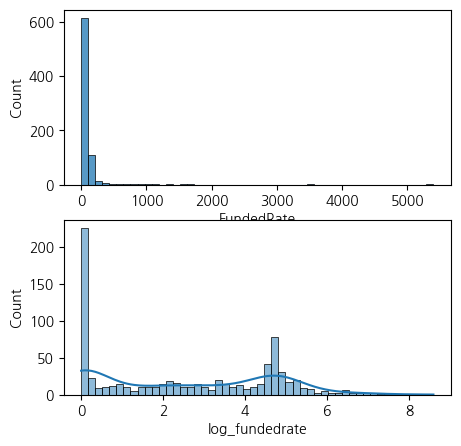

In [12]:
figure = plt.figure(figsize=(5, 5))
ax1 = figure.add_subplot(2, 1, 1)
ax2 = figure.add_subplot(2, 1, 2)

sns.histplot(df['FundedRate'],bins= 50, ax=ax1)
sns.histplot(df['log_fundedrate'],bins = 50 , kde= True ,ax=ax2)

fundedrate와 backers 는 log변환된 값을 사용하겠다

In [13]:
df.drop(columns=['FundedRate', 'Backers'], inplace=True)

<ipython-input-13-ae2d3c76cd57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['FundedRate', 'Backers'], inplace=True)


투자자를 모집하기 위해서 프로젝트 생성자가 한 활동으로 추정되는


Creation: 프로젝트 생성 수 (해당 사용자가 생성한 프로젝트 수)

Success: 성공한 프로젝트 수

Invest: 투자 참여 횟수

InvestSuccess: 성공적으로 투자한 횟수

Rewards: 보상 수 (후원자에게 제공되는 보상 항목 수)

의 칼럼과 Success의 관계를 시각화 해서 보겠습니다

In [14]:
df['log_Creation'] = np.log1p(df['#ofCreation'])
df['log_Success'] = np.log1p(df['#ofSuccess'])
df['log_Invest'] = np.log1p(df['#ofInvest'])
df['log_InvestSuccess'] = np.log1p(df['#ofInvestSuccess'])
df['log_Rewards'] = np.log1p(df['#ofRewards'])

<ipython-input-14-52d4691deceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_Creation'] = np.log1p(df['#ofCreation'])
<ipython-input-14-52d4691deceb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_Success'] = np.log1p(df['#ofSuccess'])
<ipython-input-14-52d4691deceb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

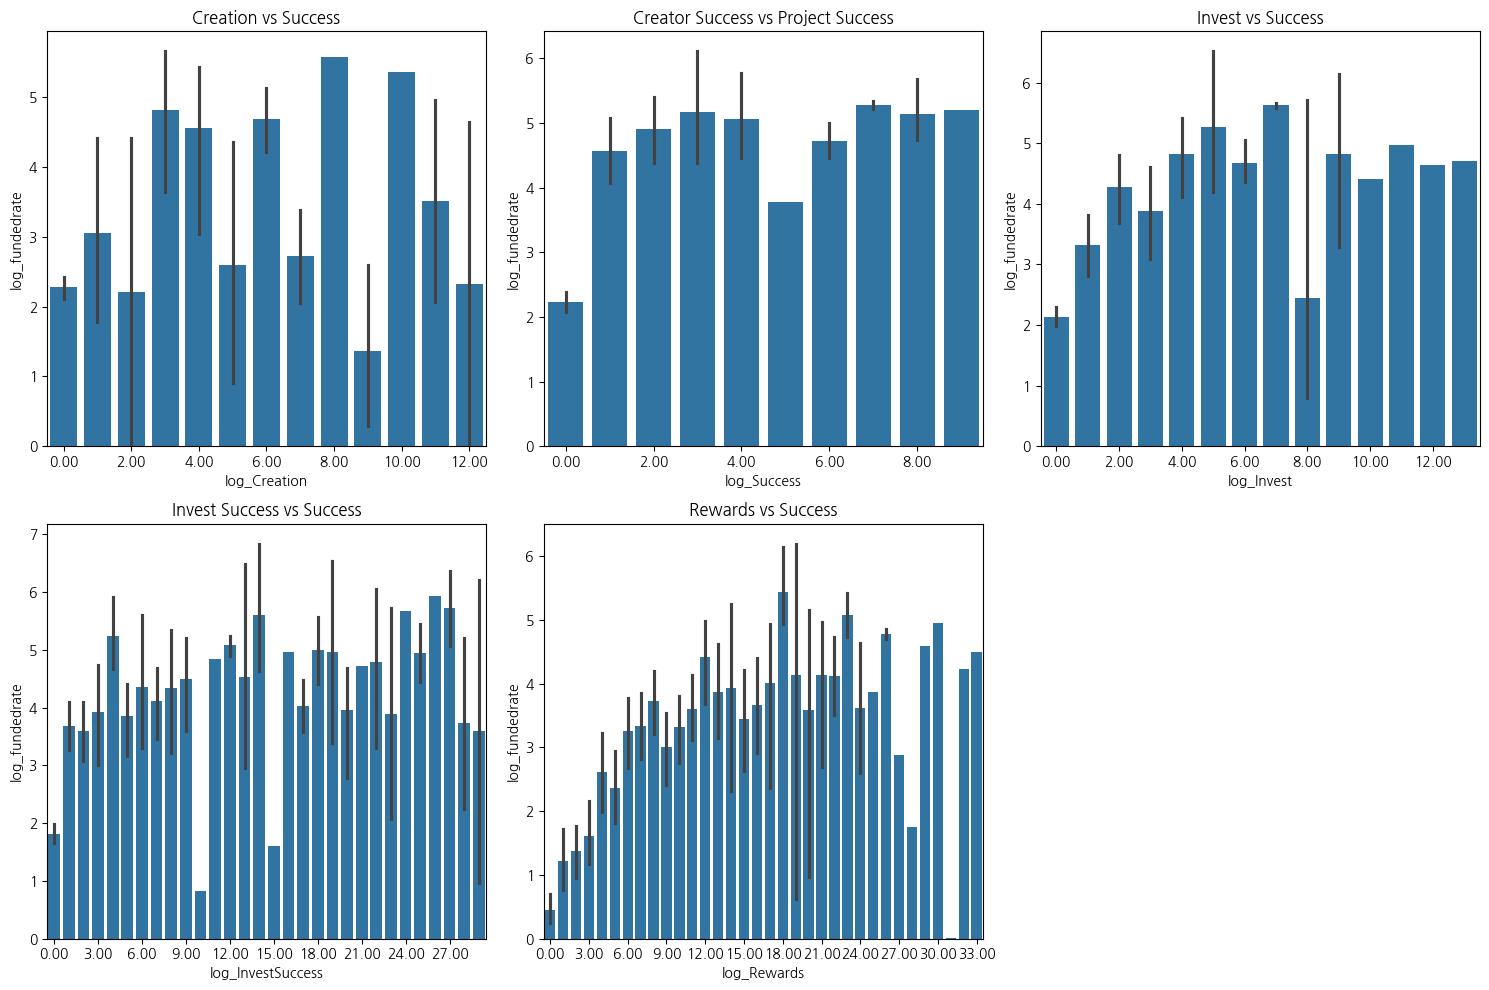

In [15]:
# 소수점 2자리 포맷 함수 정의
def format_fn(tick_val, pos):
    return f'{tick_val:.2f}'

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.barplot(y='log_fundedrate', x='log_Creation', data=df)
plt.title('Creation vs Success')
plt.xticks(ticks=range(0, len(df['log_Creation'].unique()), 2))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_fn))  # 소수점 2자리 포맷 적용

plt.subplot(2, 3, 2)
sns.barplot(y='log_fundedrate', x='log_Success', data=df)
plt.title('Creator Success vs Project Success')
plt.xticks(ticks=range(0, len(df['log_Success'].unique()), 2))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_fn))  # 소수점 2자리 포맷 적용

plt.subplot(2, 3, 3)
sns.barplot(y='log_fundedrate', x='log_Invest', data=df)
plt.title('Invest vs Success')
plt.xticks(ticks=range(0, len(df['log_Invest'].unique()), 2))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_fn))  # 소수점 2자리 포맷 적용

plt.subplot(2, 3, 4)
sns.barplot(y='log_fundedrate', x='log_InvestSuccess', data=df)
plt.title('Invest Success vs Success')
plt.xticks(ticks=range(0, len(df['log_InvestSuccess'].unique()), 3))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_fn))  # 소수점 2자리 포맷 적용

plt.subplot(2, 3, 5)
sns.barplot(y='log_fundedrate', x='log_Rewards', data=df)
plt.title('Rewards vs Success')
plt.xticks(ticks=range(0, len(df['log_Rewards'].unique()), 3))
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_fn))  # 소수점 2자리 포맷 적용

plt.tight_layout()
plt.show()

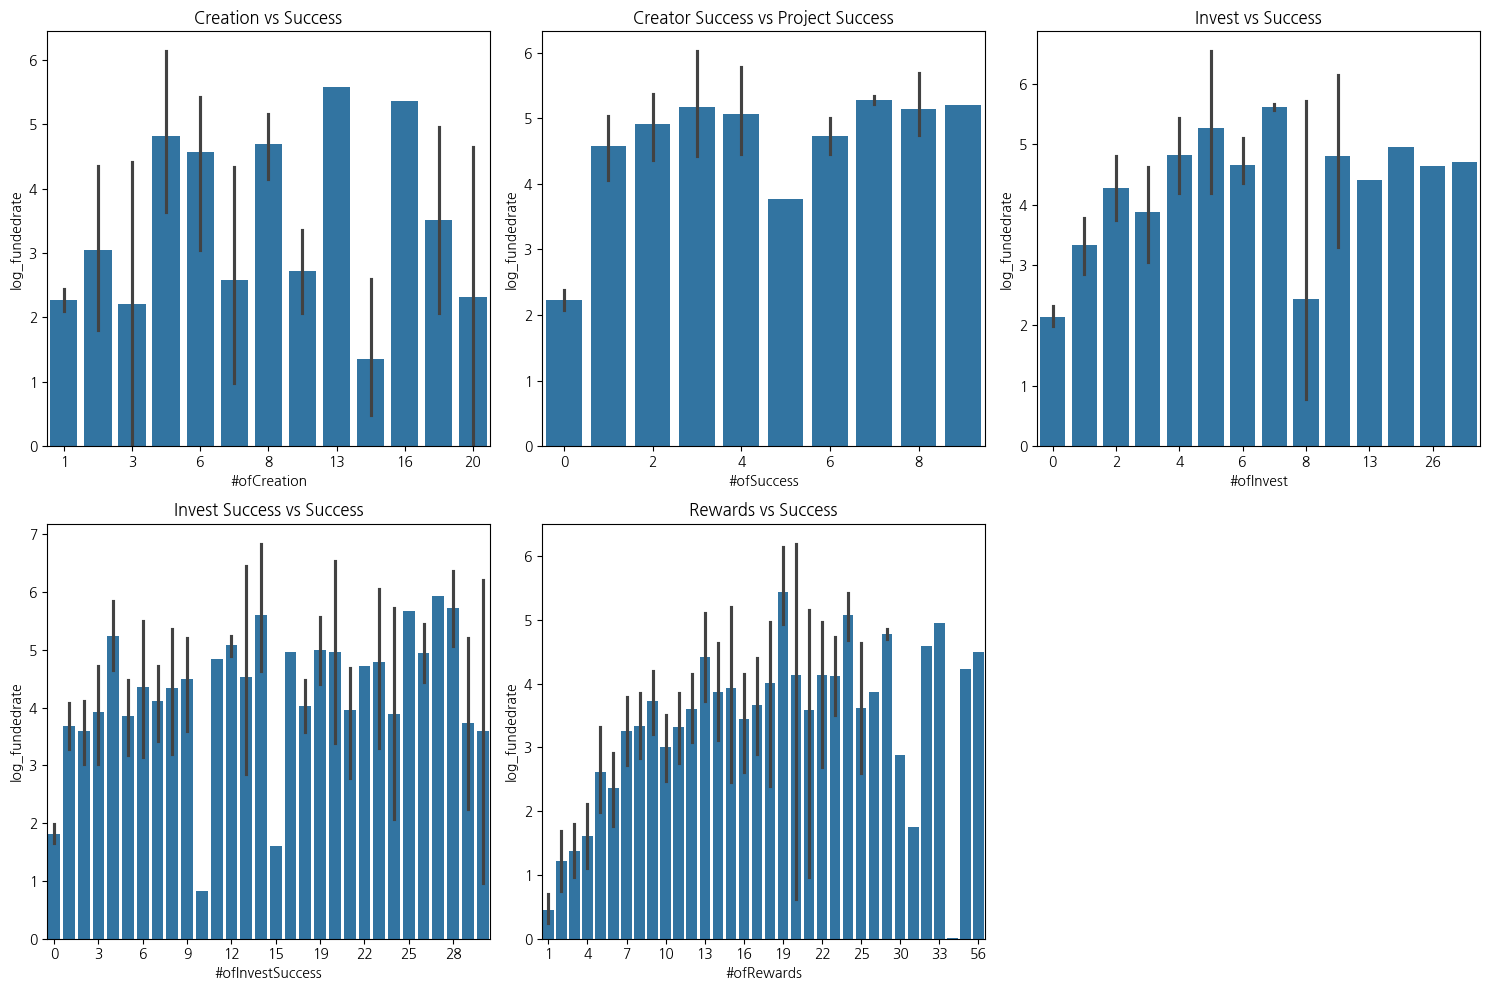

In [16]:
plt.figure(figsize=(15, 10))
# 로그 변환한 Creation과 Success의 관계
plt.subplot(2, 3, 1)
sns.barplot(y='log_fundedrate', x='#ofCreation', data=df)
plt.title('Creation vs Success')
plt.xticks(ticks=range(0, len(df['#ofCreation'].unique()), 2))

plt.subplot(2, 3, 2)
sns.barplot(y='log_fundedrate', x='#ofSuccess', data=df)
plt.title('Creator Success vs Project Success')
plt.xticks(ticks=range(0, len(df['#ofSuccess'].unique()), 2))

plt.subplot(2, 3, 3)
sns.barplot(y='log_fundedrate', x='#ofInvest', data=df)
plt.title('Invest vs Success')
plt.xticks(ticks=range(0, len(df['#ofInvest'].unique()), 2))

plt.subplot(2, 3, 4)
sns.barplot(y='log_fundedrate', x='#ofInvestSuccess', data=df)
plt.title('Invest Success vs Success')
plt.xticks(ticks=range(0, len(df['#ofInvestSuccess'].unique()), 3))

plt.subplot(2, 3, 5)
sns.barplot(y='log_fundedrate', x='#ofRewards', data=df)
plt.title('Rewards vs Success')
plt.xticks(ticks=range(0, len(df['#ofRewards'].unique()), 3))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

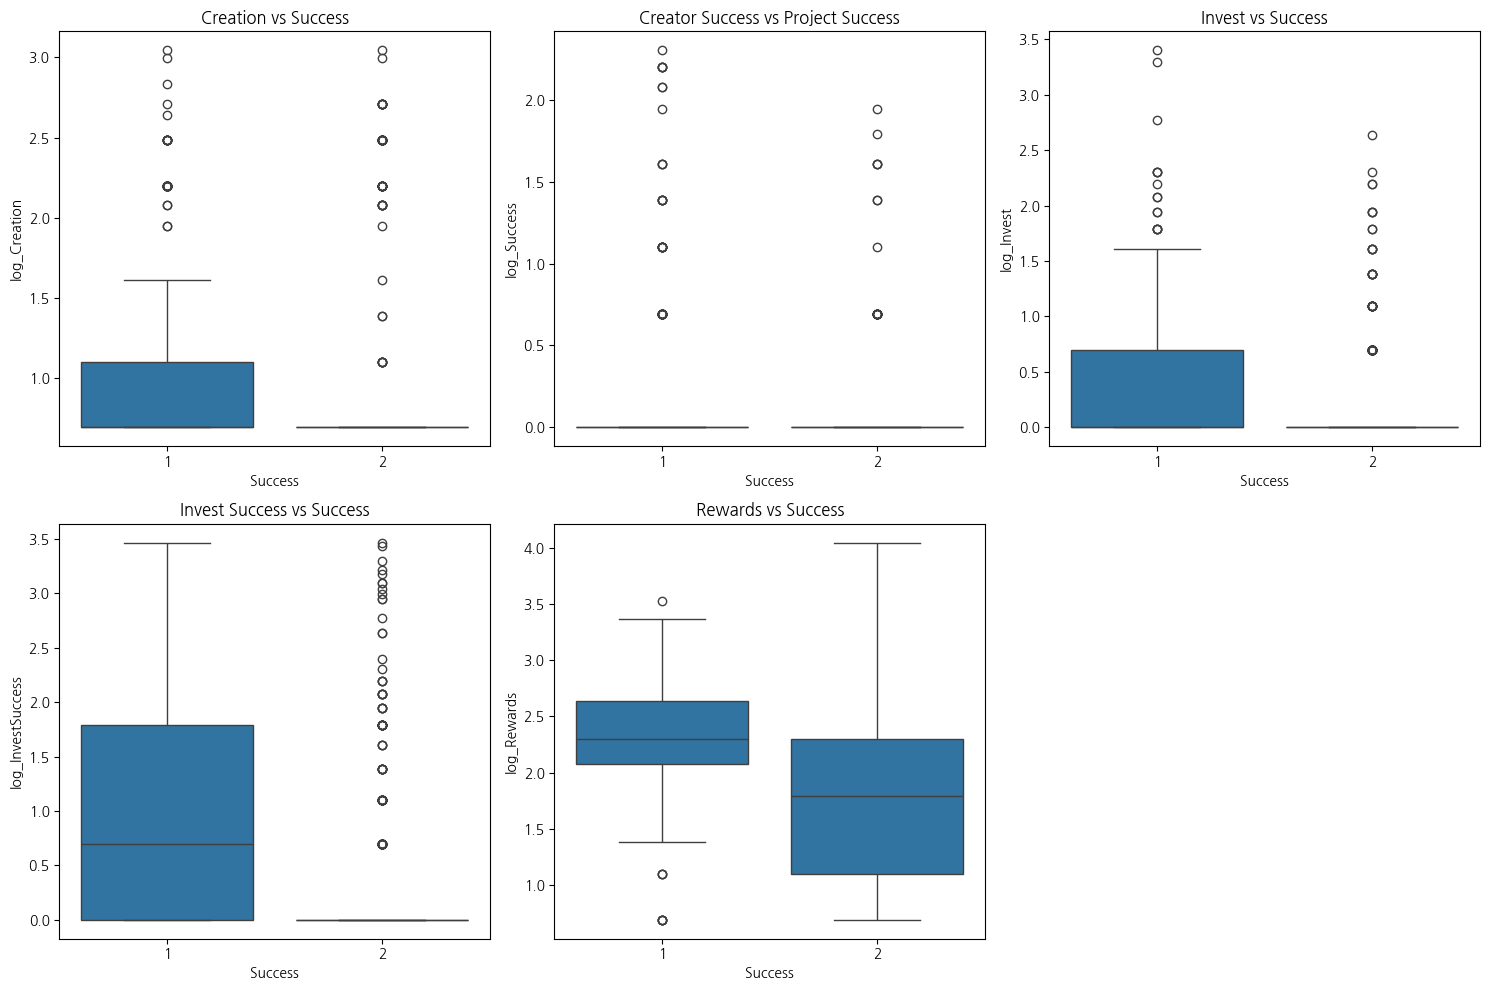

In [17]:
plt.figure(figsize=(15, 10))
# 로그 변환한 Creation과 Success의 관계
plt.subplot(2, 3, 1)
sns.boxplot(x='Success', y='log_Creation', data=df)
plt.title('Creation vs Success')

plt.subplot(2, 3, 2)
sns.boxplot(x='Success', y='log_Success', data=df)
plt.title('Creator Success vs Project Success')

plt.subplot(2, 3, 3)
sns.boxplot(x='Success', y='log_Invest', data=df)
plt.title('Invest vs Success')


plt.subplot(2, 3, 4)
sns.boxplot(x='Success', y='log_InvestSuccess', data=df)
plt.title('Invest Success vs Success')

plt.subplot(2, 3, 5)
sns.boxplot(x='Success', y='log_Rewards', data=df)
plt.title('Rewards vs Success')
plt.tight_layout()
plt.show()

투자 모금을 실패한 경우 Creation , Invest , Rewards 가 0 인 경우가 매우 많다.

투자 모금이 처음이거나 다른 투자를 거의 하지 않거나  투자자들에게 보상이 돌아 가지 않으면 투자는 실패할 확률이 높다

투자관련 예측을 할때 유의미한 피쳐가 될 것이다. 다만 대부분의 값이 0에 몰려있고 이상치 범위가 커서 학습시 영향을 안좋은 방향으로 받을 수 있다

따라서 로그변환된 피쳐를 스케일링을 해서 사용하겠다

In [18]:
df.drop( columns = ['#ofCreation', '#ofSuccess','#ofInvest', '#ofInvestSuccess', '#ofRewards'] , inplace =True)

<ipython-input-18-a7ee0034bb80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop( columns = ['#ofCreation', '#ofSuccess','#ofInvest', '#ofInvestSuccess', '#ofRewards'] , inplace =True)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Success', ylabel='Friends'>

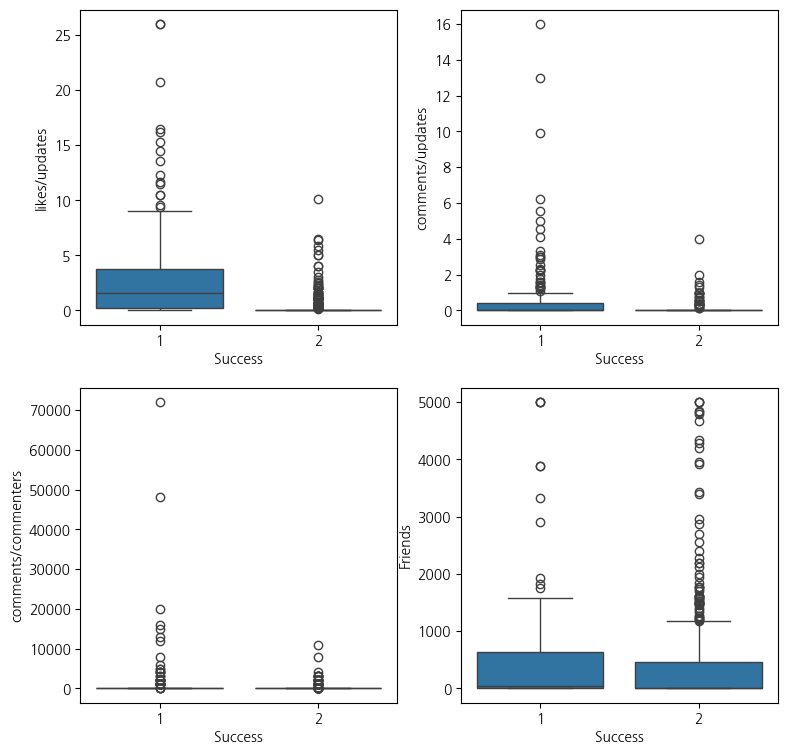

In [19]:
plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
sns.boxplot(x='Success', y='likes/updates', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='Success', y='comments/updates', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='Success', y='comments/commenters', data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Success', y='Friends', data=df)

전체적으로 피쳐가 log변환이 필요해 보인다

<ipython-input-20-15d7afc44876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_likes/updates'] = np.log1p(df['likes/updates'])
<ipython-input-20-15d7afc44876>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_comments/updates'] = np.log1p(df['comments/updates'])
<ipython-input-20-15d7afc44876>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

<Axes: xlabel='Success', ylabel='log_friends'>

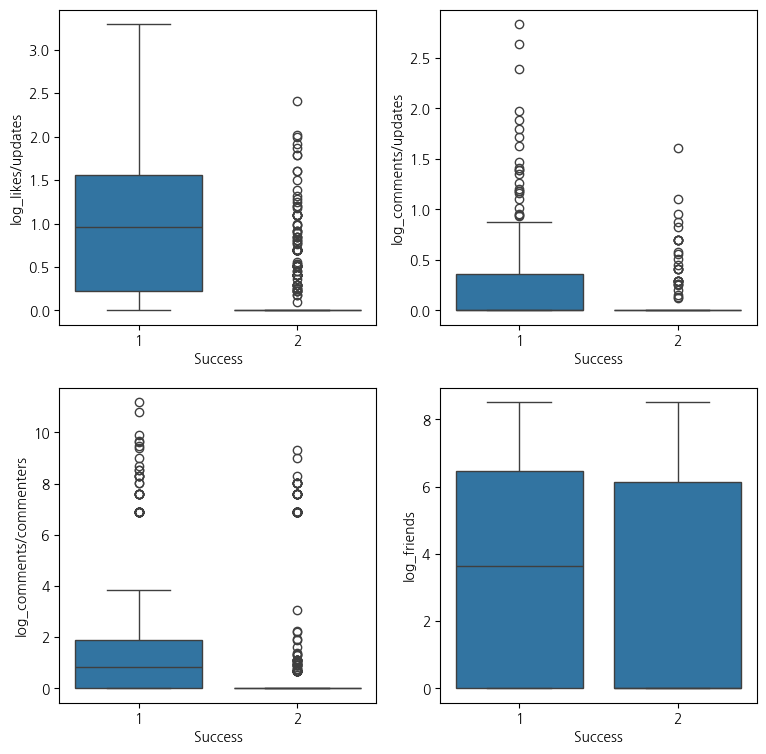

In [20]:
df['log_likes/updates'] = np.log1p(df['likes/updates'])
df['log_comments/updates'] = np.log1p(df['comments/updates'])
df['log_comments/commenters'] = np.log1p(df['comments/commenters'])
df['log_friends'] = np.log1p(df['Friends'])
plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
sns.boxplot(x='Success', y='log_likes/updates', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='Success', y='log_comments/updates', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='Success', y='log_comments/commenters', data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Success', y='log_friends', data=df)

큰 차이는 없지만 log 변환한 피쳐가 더 좋아 보인다

In [21]:
df.drop(columns=['likes/updates', 'comments/updates', 'comments/commenters', 'Friends'], inplace=True)

<ipython-input-21-d4f0103373db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['likes/updates', 'comments/updates', 'comments/commenters', 'Friends'], inplace=True)


In [22]:
df["log_commenters"] = np.log1p(df["#ofCommenters"])
df["log_videocount"] = np.log1p(df["VideoCount"])
df["log_imagecount"] = np.log1p(df["ImageCount"])
df['log_total_updates'] = np.log1p(df['Total_Updates'])
df.drop(columns=["#ofCommenters" ,"VideoCount" ,"ImageCount" , "Total_Updates"], inplace=True)

<ipython-input-22-de50150d9806>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_commenters"] = np.log1p(df["#ofCommenters"])
<ipython-input-22-de50150d9806>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_videocount"] = np.log1p(df["VideoCount"])
<ipython-input-22-de50150d9806>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [23]:
df.columns

Index(['Project ID', 'Funded', 'Success', 'Goal', 'Period', 'SNS',
       'CountryCode_1', 'CountryCode_2', 'CountryCode_3', 'CountryCode_4',
       'CountryCode_5', 'CountryCode_6', 'CountryCode_7', 'CountryCode_8',
       'CountryCode_9', 'CountryCode_10', 'CountryCode_11', 'CountryCode_12',
       'CountryCode_14', 'CountryCode_15', 'TagCode_1', 'TagCode_2',
       'TagCode_3', 'TagCode_4', 'TagCode_5', 'TagCode_6', 'TagCode_7',
       'TagCode_8', 'TagCode_9', 'TagCode_10', 'TagCode_11', 'TagCode_12',
       'TagCode_13', 'TagCode_14', 'TagCode_15', 'log_fundedrate',
       'log_backers', 'log_Creation', 'log_Success', 'log_Invest',
       'log_InvestSuccess', 'log_Rewards', 'log_likes/updates',
       'log_comments/updates', 'log_comments/commenters', 'log_friends',
       'log_commenters', 'log_videocount', 'log_imagecount',
       'log_total_updates'],
      dtype='object')

### 모델링


feature : ['Period', 'SNS', 'CountryCode_1', 'CountryCode_2', 'CountryCode_3','CountryCode_4', 'CountryCode_5', 'CountryCode_6', 'CountryCode_7','CountryCode_8', 'CountryCode_9', 'CountryCode_10', 'CountryCode_11','CountryCode_12', 'CountryCode_14', 'CountryCode_15', 'TagCode_1','TagCode_2', 'TagCode_3', 'TagCode_4', 'TagCode_5', 'TagCode_6','TagCode_7', 'TagCode_8', 'TagCode_9', 'TagCode_10', 'TagCode_11','TagCode_12', 'TagCode_13', 'TagCode_14', 'TagCode_15', 'log_backers','log_Creation', 'log_Success', 'log_Invest', 'log_InvestSuccess','log_Rewards', 'log_likes/updates', 'log_comments/updates','log_comments/commenters', 'log_friends', 'log_commenters','log_videocount', 'log_imagecount', 'log_total_updates']

 target : log_fundedrate

In [24]:
x_feature = df.drop(columns = ['Project ID' , 'Funded' , 'Success' , 'Goal' , 'log_fundedrate'])
x_target = df["log_fundedrate"]

In [25]:
x_feature.columns

Index(['Period', 'SNS', 'CountryCode_1', 'CountryCode_2', 'CountryCode_3',
       'CountryCode_4', 'CountryCode_5', 'CountryCode_6', 'CountryCode_7',
       'CountryCode_8', 'CountryCode_9', 'CountryCode_10', 'CountryCode_11',
       'CountryCode_12', 'CountryCode_14', 'CountryCode_15', 'TagCode_1',
       'TagCode_2', 'TagCode_3', 'TagCode_4', 'TagCode_5', 'TagCode_6',
       'TagCode_7', 'TagCode_8', 'TagCode_9', 'TagCode_10', 'TagCode_11',
       'TagCode_12', 'TagCode_13', 'TagCode_14', 'TagCode_15', 'log_backers',
       'log_Creation', 'log_Success', 'log_Invest', 'log_InvestSuccess',
       'log_Rewards', 'log_likes/updates', 'log_comments/updates',
       'log_comments/commenters', 'log_friends', 'log_commenters',
       'log_videocount', 'log_imagecount', 'log_total_updates'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ss_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
ss_columns = ['Period', 'log_backers',
       'log_Creation', 'log_Success', 'log_Invest', 'log_InvestSuccess',
       'log_Rewards', 'log_likes/updates', 'log_comments/updates',
       'log_comments/commenters', 'log_friends', 'log_commenters',
       'log_videocount', 'log_imagecount', 'log_total_updates']
x_feature[ss_columns] = ss_scaler.fit_transform(x_feature[ss_columns])

카테고리 피쳐  sns , country, tag 를 제외한 전체 칼럼을 정규화를 진행하겠다

In [27]:
x_feature

,Period,SNS,CountryCode_1,CountryCode_2,CountryCode_3,CountryCode_4,CountryCode_5,CountryCode_6,CountryCode_7,CountryCode_8,CountryCode_9,CountryCode_10,CountryCode_11,CountryCode_12,CountryCode_14,CountryCode_15,TagCode_1,TagCode_2,TagCode_3,TagCode_4,TagCode_5,TagCode_6,TagCode_7,TagCode_8,TagCode_9,TagCode_10,TagCode_11,TagCode_12,TagCode_13,TagCode_14,TagCode_15,log_backers,log_Creation,log_Success,log_Invest,log_InvestSuccess,log_Rewards,log_likes/updates,log_comments/updates,log_comments/commenters,log_friends,log_commenters,log_videocount,log_imagecount,log_total_updates
0,-1.232634,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.196963,-0.418379,-0.290559,-0.422580,-0.548628,-1.700638,-0.599567,-0.329415,-0.467559,0.093622,-0.401096,-0.346254,-1.004721,-0.852938
1,-0.300135,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.424243,2.636477,-0.290559,-0.422580,-0.548628,0.577425,-0.599567,-0.329415,-0.467559,1.558959,-0.401096,-0.346254,-1.004721,-0.852938
2,-0.300135,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.196963,-0.418379,-0.290559,-0.422580,-0.548628,-1.126726,-0.599567,-0.329415,-0.467559,1.058682,-0.401096,-0.346254,-1.004721,-0.852938
3,-0.300135,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.864170,-0.418379,-0.290559,-0.422580,-0.548628,-0.403683,-0.218270,-0.329415,-0.467559,1.711764,-0.401096,-0.346254,0.055437,1.519363
4,2.158271,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.317751,-0.418379,-0.290559,-0.422580,1.337329,0.428293,2.511271,1.870194,-0.064480,-0.941062,3.367721,-0.346254,1.816322,2.157793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.886682,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.894770,-0.418379,-0.290559,-0.422580,1.550976,0.428293,-0.599567,-0.329415,0.315345,0.192537,0.486117,-0.346254,1.621395,-0.062171
763,-0.384908,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.481772,-0.418379,-0.290559,-0.422580,-0.548628,0.577425,-0.599567,-0.329415,-0.467559,-0.941062,-0.401096,-0.346254,-1.004721,0.728596
764,-0.300135,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.143454,-0.418379,-0.290559,1.688244,1.075847,1.242687,2.119131,0.957240,0.343285,0.756447,1.005103,-0.346254,1.013478,1.882666
765,-0.469680,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.385427,2.145994,4.266742,-0.422580,1.731611,0.712331,-0.599567,0.583424,-0.025625,1.133431,0.486117,-0.346254,1.013478,1.367026


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [29]:
X_train , X_test , y_train , y_test = train_test_split(x_feature , x_target , test_size = 0.2 , random_state = 42)

In [30]:
def evaluate(y,pred):
    mse = mean_squared_error(y,pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y,pred)
    print("mse : {0:0.4f} , rmse : {1:0.4f} , r2 : {2:0.4f}".format(mse,rmse,r2))

기본 linear model 에서 mse : 0.9806 , r2 : 0.7734 를 얻었다.

이미 굉장히 좋은 예측값이다.

In [31]:
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
evaluate(y_test , y_pred)

mse : 0.9806 , rmse : 0.9903 , r2 : 0.7734


In [32]:
for i in range(1,4):
  poly_features = PolynomialFeatures(degree = i)
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly = poly_features.transform(X_test)
  lr_poly = LinearRegression()
  lr_poly.fit(X_train_poly , y_train)
  y_pred = lr_poly.predict(X_test_poly)
  mse = mean_squared_error(y_test , y_pred)
  r2 = r2_score(y_test , y_pred)
  print(i,'차 다항식 : ',end="")
  evaluate(y_test , y_pred)

1 차 다항식 : mse : 0.9806 , rmse : 0.9903 , r2 : 0.7734
2 차 다항식 : mse : 11.9950 , rmse : 3.4634 , r2 : -1.7717
3 차 다항식 : mse : 11.5655 , rmse : 3.4008 , r2 : -1.6725


2차 이상 다항회귀 시 지표가 급격하게 안좋아진다.

2차 이상 다항회귀는 사용하지 않겠다

In [33]:
evaluate(y_test , y_pred)

mse : 11.5655 , rmse : 3.4008 , r2 : -1.6725


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


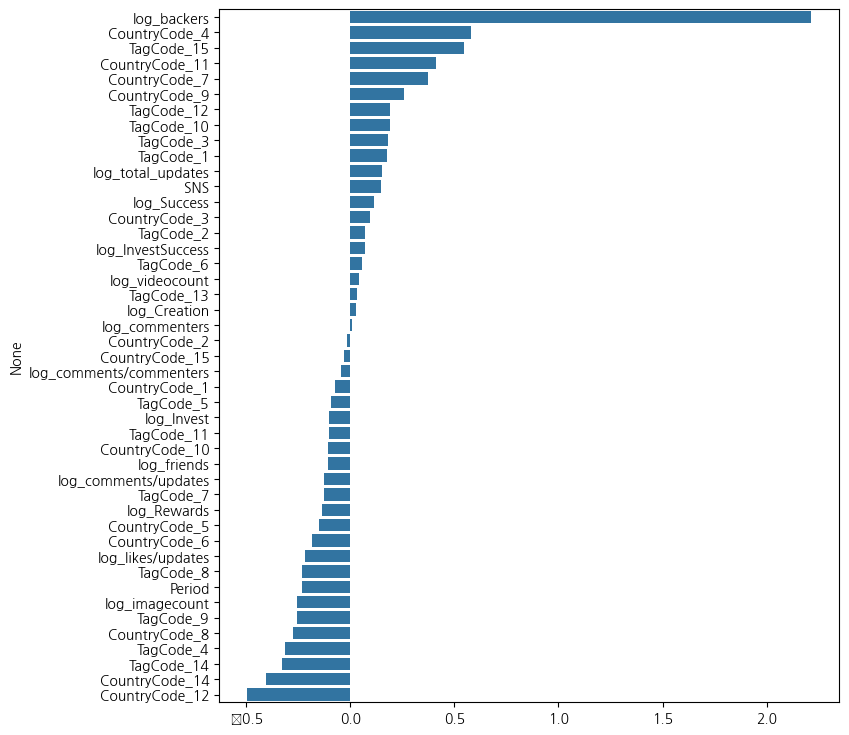

In [34]:
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)

def model_coef(model , i ,j):
  coef = pd.Series(model.coef_, index=X_train.columns)
  coef_sort =  coef.sort_values(ascending=False)
  plt.figure(figsize=(i, j))
  sns.barplot(x=coef_sort.values, y=coef_sort.index)

model_coef(lr , 8 , 9)

linear regression으로 log_fundedrate 예측 시행시 양의 상관관계로 log_backers 가 가장 상관관계가 크며 음의 상관관계로 TagCode_10 이 가장 크게 작동한다

backers가 많을 수록 투자 성공률이 크게 증가하며 특정 국가코드와 테그코드도 투자 성공여부가 크게 작동한다 sns와 주기적인 업데이트도 중요한 것을 알 수 있다

In [35]:
ridge = Ridge()
alpha_range = [ 0.1 , 0.5 , 1 ,10 ,15, 20]
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print(f"최적의 alpha 값: {grid_search.best_params_['alpha']}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

evaluate(y_test , y_pred)

최적의 alpha 값: 10
mse : 0.9505 , rmse : 0.9750 , r2 : 0.7804


In [36]:
def linear_alpha_search(model, param_grid, X_train, y_train ,X_test , y_test):
  param_grid = {'alpha': [0.001,0.005, 0.01, 0.1, 1, 10, 15 , 20]}
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
  grid_search.fit(X_train, y_train)
  print(f"최적의 alpha 값: {grid_search.best_params_['alpha']}")
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)
  evaluate(y_test , y_pred)



In [37]:
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
model = [ridge , lasso , elastic]
for i in model:
  print(i)
  linear_alpha_search(i , param_grid , X_train , y_train , X_test , y_test)
  print("")

Ridge()
최적의 alpha 값: 10
mse : 0.9505 , rmse : 0.9750 , r2 : 0.7804

Lasso()
최적의 alpha 값: 0.01
mse : 0.9616 , rmse : 0.9806 , r2 : 0.7778

ElasticNet()
최적의 alpha 값: 0.01
mse : 0.9536 , rmse : 0.9765 , r2 : 0.7796



릿지,라쏘,엘라스틱 모델 중

라쏘에 비해서 릿지가 좋아 보이고

엘라스틱 회귀는 릿지와 라쏘의 비율을 조정할 필요가 있어보인다

In [38]:
warnings.filterwarnings('ignore')
elastic_net = ElasticNet()
param_grid = {
    'alpha': [0.001,0.005, 0.01, 0.1 , 0.5 , 1 ,10] ,
    'l1_ratio': np.linspace(0, 1, 10)
}

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error' ,verbose = False)
grid_search.fit(X_train, y_train)

print()
print(f"최적의 alpha 값: {grid_search.best_params_['alpha']}")
print(f"최적의 l1_ratio 값: {grid_search.best_params_['l1_ratio']}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
evaluate(y_test , y_pred)


최적의 alpha 값: 0.01
최적의 l1_ratio 값: 1.0
mse : 0.9616 , rmse : 0.9806 , r2 : 0.7778


그리드서치를 진행하였지만 lr_ratio가 1.0이라 라쏘는 무시되었고 교차검증으로 인한 데이터 수가 떨어짐으로 인해 지표가 하락하였다

기본적인 릿지 모델을 사용하는게 바람직할 것 같다

Ridge(alpha = 10) 이 최적의 모델로 보인다

트리계열의 회귀 모델을 사용해서 릿지모델과 비교해보겠다.

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_predict


In [40]:
warnings.filterwarnings('ignore')
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42 )
gb_reg = GradientBoostingRegressor(random_state=42)
ada_reg = AdaBoostRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42 , verbose = -1)
lgb_reg = LGBMRegressor(random_state=42 , verbose = -1)

models = [dt_reg , rf_reg , gb_reg , ada_reg , xgb_reg , lgb_reg]
for model in models:
  print()
  pred = cross_val_predict(model, X_train, y_train, cv=5)
  print(f'{model.__class__.__name__} 평가 결과')
  evaluate(y_train, pred)


DecisionTreeRegressor 평가 결과
mse : 1.7958 , rmse : 1.3401 , r2 : 0.6206

RandomForestRegressor 평가 결과
mse : 0.9582 , rmse : 0.9789 , r2 : 0.7975

GradientBoostingRegressor 평가 결과
mse : 0.9304 , rmse : 0.9646 , r2 : 0.8034

AdaBoostRegressor 평가 결과
mse : 1.4292 , rmse : 1.1955 , r2 : 0.6980

XGBRegressor 평가 결과
mse : 1.0941 , rmse : 1.0460 , r2 : 0.7688

LGBMRegressor 평가 결과
mse : 0.9619 , rmse : 0.9807 , r2 : 0.7968


트리계열 회귀모델도 꽤나 좋은 성능을 보인다

랜덤포레스트와 그레디언트부스팅 , lgbm 에서 좋은 성능을 보였다.


<Axes: ylabel='None'>

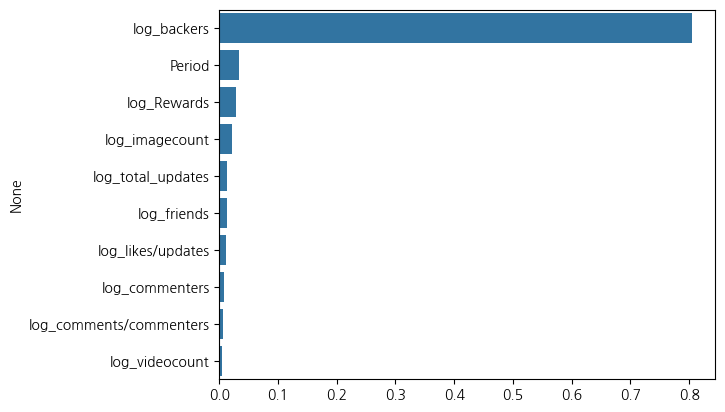

In [41]:
rf_reg = RandomForestRegressor(random_state=42 )
rf_reg.fit(X_train , y_train)
feature_series = pd.Series(rf_reg.feature_importances_ , index = X_train.columns)
feature_series=feature_series.sort_values(ascending = False).head(10)
sns.barplot(x=feature_series.values, y=feature_series.index)

트리계열의 피쳐별 중요도를 시각화 할 수 있다

backers가 얼마나 , period가 적정한 기간인가 , 투자자들에게 적절한 reward가 주어지는가 등으로
투자 성공여부가 결정되는 것을 알 수 있다